Epoch 1/100


C:\Users\harib\PycharmProjects\Flask\BharathIntern\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1615244296192.0000 - val_loss: 1632361644032.0000
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1642231365632.0000 - val_loss: 1632202915840.0000
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 1597854056448.0000 - val_loss: 1631716507648.0000
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1630489018368.0000 - val_loss: 1630693228544.0000
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1611203477504.0000 - val_loss: 1628936863744.0000
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 1635851042816.0000 - val_loss: 1626235338752.0000
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1634226012160.0000 - val_loss: 1622474620928.0000
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1597887610880.0000 - val_loss: 1617447616512.0000
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 1626517798912.0000 - val_loss: 1611008311296.0000
Epoch 10/100
75

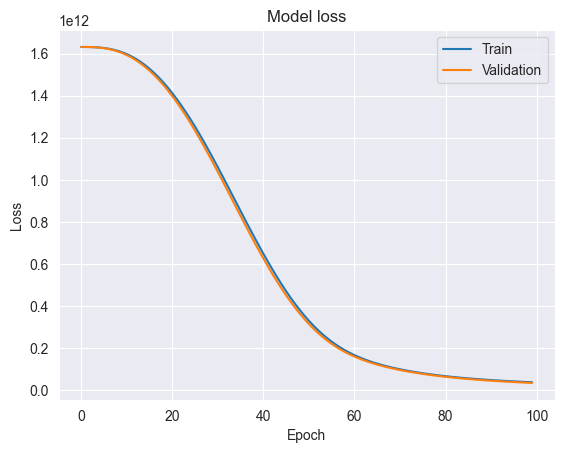

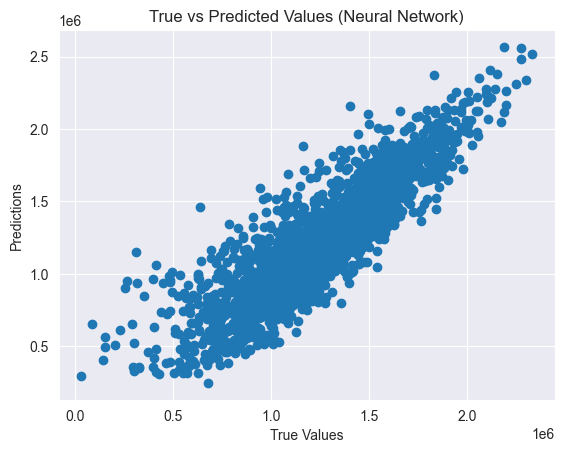

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
USAhousing = pd.read_csv('USA_Housing.csv')

# Features and target
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train_nn = nn_model.predict(X_train)
y_pred_test_nn = nn_model.predict(X_test)

# Evaluate the model
mse_train_nn = metrics.mean_squared_error(y_train, y_pred_train_nn)
mse_test_nn = metrics.mean_squared_error(y_test, y_pred_test_nn)

print(f"Neural Network - Training MSE: {mse_train_nn:.2f}")
print(f"Neural Network - Testing MSE: {mse_test_nn:.2f}")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred_test_nn)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Neural Network)')
plt.show()



MAE: 82288.22251914963
MSE: 10460958907.20974
RMSE: 102278.8292229127


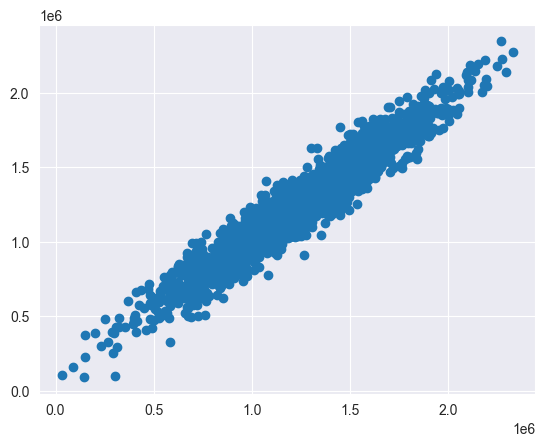

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))